# auto_scout_project

## 1. Import Modules, Load Data and Data Review


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

%matplotlib inline


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
from skimpy import clean_columns as cc


In [2]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : mean_squared_error(y_train, y_train_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : mean_squared_error(y_test, y_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

In [3]:
df_first = pd.read_csv('final_scout_not_dummy.csv')
df_first.head(5)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [4]:
df = df_first.copy()
df.head(5)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [5]:
df = cc(df)
df.columns.tolist()

16 column names have been cleaned

['make_model',
 'body_type',
 'price',
 'vat',
 'km',
 'type',
 'fuel',
 'gears',
 'comfort_convenience',
 'entertainment_media',
 'extras',
 'safety_security',
 'age',
 'previous_owners',
 'hp_k_w',
 'inspection_new',
 'paint_type',
 'upholstery_type',
 'gearing_type',
 'displacement_cc',
 'weight_kg',
 'drive_chain',
 'cons_comb']

In [6]:
df = df.rename(columns={'hp_k_w': 'hp_kw'})

In [7]:
df.columns.tolist()

['make_model',
 'body_type',
 'price',
 'vat',
 'km',
 'type',
 'fuel',
 'gears',
 'comfort_convenience',
 'entertainment_media',
 'extras',
 'safety_security',
 'age',
 'previous_owners',
 'hp_kw',
 'inspection_new',
 'paint_type',
 'upholstery_type',
 'gearing_type',
 'displacement_cc',
 'weight_kg',
 'drive_chain',
 'cons_comb']

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   type                 15915 non-null  object 
 6   fuel                 15915 non-null  object 
 7   gears                15915 non-null  float64
 8   comfort_convenience  15915 non-null  object 
 9   entertainment_media  15915 non-null  object 
 10  extras               15915 non-null  object 
 11  safety_security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  previous_owners      15915 non-null  float64
 14  hp_kw                15915 non-null  float64
 15  inspection_new       15915 non-null 

In [9]:
# Count the number of unique values in each column
df.nunique()

make_model                9
body_type                 8
price                  2952
vat                       2
km                     6691
type                      5
fuel                      4
gears                     4
comfort_convenience    6196
entertainment_media     346
extras                  659
safety_security        4442
age                       4
previous_owners           5
hp_kw                    77
inspection_new            2
paint_type                3
upholstery_type           2
gearing_type              3
displacement_cc          68
weight_kg               432
drive_chain               3
cons_comb                62
dtype: int64

In [10]:
df.isna().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
type                   0
fuel                   0
gears                  0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
age                    0
previous_owners        0
hp_kw                  0
inspection_new         0
paint_type             0
upholstery_type        0
gearing_type           0
displacement_cc        0
weight_kg              0
drive_chain            0
cons_comb              0
dtype: int64

In [11]:
df.duplicated().sum()

1673

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(14242, 23)

In [14]:
df["make_model"].value_counts()

Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: make_model, dtype: int64

In [15]:
# "make_model" sütunundaki değerlerin sayısını hesapla
counts = df["make_model"].value_counts()

# Sayısı 100'den fazla olan değerleri koru
df = df[df["make_model"].isin(counts[counts > 100].index)]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14221 entries, 0 to 15912
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14221 non-null  object 
 1   body_type            14221 non-null  object 
 2   price                14221 non-null  int64  
 3   vat                  14221 non-null  object 
 4   km                   14221 non-null  float64
 5   type                 14221 non-null  object 
 6   fuel                 14221 non-null  object 
 7   gears                14221 non-null  float64
 8   comfort_convenience  14221 non-null  object 
 9   entertainment_media  14221 non-null  object 
 10  extras               14221 non-null  object 
 11  safety_security      14221 non-null  object 
 12  age                  14221 non-null  float64
 13  previous_owners      14221 non-null  float64
 14  hp_kw                14221 non-null  float64
 15  inspection_new       14221 non-null 

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14221.0,18107.423458,7423.513370,4950.0,12950.0,16950.0,21900.0,74600.0
km,14221.0,32627.045133,36864.909737,0.0,3921.0,21085.0,47000.0,317000.0
gears,14221.0,5.939456,0.703361,5.0,5.0,6.0,6.0,8.0
age,14221.0,1.417059,1.109080,0.0,0.0,1.0,2.0,3.0
previous_owners,14221.0,1.042261,0.335395,0.0,1.0,1.0,1.0,4.0
hp_kw,14221.0,88.729906,26.564262,40.0,66.0,85.0,103.0,294.0
inspection_new,14221.0,0.256663,0.436807,0.0,0.0,0.0,1.0,1.0
displacement_cc,14221.0,1432.533296,277.490938,890.0,1229.0,1461.0,1598.0,2967.0
weight_kg,14221.0,1342.666198,201.275225,840.0,1165.0,1322.0,1487.0,2471.0
cons_comb,14221.0,4.825213,0.862806,3.0,4.1,4.8,5.4,9.1


In [18]:
# price sütununu başa aldık.
df = df[['price'] + [col for col in df.columns if col != 'price']]
df.head()

,price,make_model,body_type,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb
0,15770,Audi A1,Sedans,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,14500,Audi A1,Sedans,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,14640,Audi A1,Sedans,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,14500,Audi A1,Sedans,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,16790,Audi A1,Sedans,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [19]:
# araç paketleri belirlendi.
premium = ["Electrical side mirrors", "Parking assist", "Air conditioning", "Hill Holder", "Power windows"]
premium_plus = ["Multi-function", "Navigation ", "Keyless central door lock", "Heads-up", "Massage seats", "heating", "Automatic climate control", "Heated"]

comfort_package = df['comfort_convenience'].apply(lambda sentence: "Premium Plus" if all(word in sentence for word in premium_plus) else ("Premium" if all(word in sentence for word in premium) else "Standard"))
comfort_package.value_counts(dropna=False)

Standard        9648
Premium         4510
Premium Plus      63
Name: comfort_convenience, dtype: int64

In [20]:
premium = ["Electrical side mirrors", "Parking assist", "Air conditioning", "Hill Holder", "Power windows"]
premium_plus = ["Multi-function", "Navigation ", "Keyless central door lock", "Heads-up", "Massage seats", "heating", "Automatic climate control", "Heated"]

df['comfort_package'] = df['comfort_convenience'].apply(lambda sentence: "Premium Plus" if all(word in sentence for word in premium_plus) else ("Premium" if all(word in sentence for word in premium) else "Standard"))
df.head()

,price,make_model,body_type,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb,comfort_package
0,15770,Audi A1,Sedans,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,Premium
1,14500,Audi A1,Sedans,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,Standard
2,14640,Audi A1,Sedans,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,Premium
3,14500,Audi A1,Sedans,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,Standard
4,16790,Audi A1,Sedans,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,Premium


In [21]:
display(df.shape)  # the number of rows & columns BEFORE dropping process
df.drop("comfort_convenience", axis=1, inplace=True)
display(df.shape)  # the number of rows & columns AFTER dropping process

(14221, 24)

(14221, 23)

In [22]:
media_plus = ["Digital radio", "Hands-free", "Television", "Induction charging for smartphones", "Apple"]

entertainment_media_package = df['entertainment_media'].apply(lambda sentence: "Premium Media" if any(word in sentence for word in media_plus) else "Standard Media")
entertainment_media_package.value_counts(dropna=False)

Premium Media     9769
Standard Media    4452
Name: entertainment_media, dtype: int64

In [23]:
media_plus = ["Digital radio", "Hands-free", "Television", "Induction charging for smartphones", "Apple"]

df['entertainment_media_package'] = df['entertainment_media'].apply(lambda sentence: "Premium Media" if any(word in sentence for word in media_plus) else "Standard Media")
df.head()

,price,make_model,body_type,vat,km,type,fuel,gears,entertainment_media,extras,safety_security,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb,comfort_package,entertainment_media_package
0,15770,Audi A1,Sedans,VAT deductible,56013.0,Used,Diesel,7.0,"Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,Premium,Premium Media
1,14500,Audi A1,Sedans,Price negotiable,80000.0,Used,Benzine,7.0,"Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,Standard,Premium Media
2,14640,Audi A1,Sedans,VAT deductible,83450.0,Used,Diesel,7.0,"MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,Premium,Standard Media
3,14500,Audi A1,Sedans,VAT deductible,73000.0,Used,Diesel,6.0,"Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,Standard,Premium Media
4,16790,Audi A1,Sedans,VAT deductible,16200.0,Used,Diesel,7.0,"Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,Premium,Premium Media


In [24]:
display(df.shape)  # the number of rows & columns BEFORE dropping process
df.drop("entertainment_media", axis=1, inplace=True)
display(df.shape)  # the number of rows & columns AFTER dropping process

(14221, 24)

(14221, 23)

In [25]:
premium = ["Tire pressure", "Daytime running lights", "LED Headlight", "Lane departure warning system"]
premium_plus = ["Traction control", "Emergency brake assistant", "Electronic stability control", "Adaptive"]

df['safety_security_package'] = df['safety_security'].apply(lambda sentence: "Safety Premium Package" if all(word in sentence for word in premium) else ("Safety Premium Plus Package" if all(word in sentence for word in premium_plus) else "Safety Standard Package"))
df.head()

,price,make_model,body_type,vat,km,type,fuel,gears,extras,safety_security,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb,comfort_package,entertainment_media_package,safety_security_package
0,15770,Audi A1,Sedans,VAT deductible,56013.0,Used,Diesel,7.0,"Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,Premium,Premium Media,Safety Standard Package
1,14500,Audi A1,Sedans,Price negotiable,80000.0,Used,Benzine,7.0,"Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,Standard,Premium Media,Safety Standard Package
2,14640,Audi A1,Sedans,VAT deductible,83450.0,Used,Diesel,7.0,"Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,Premium,Standard Media,Safety Standard Package
3,14500,Audi A1,Sedans,VAT deductible,73000.0,Used,Diesel,6.0,"Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,Standard,Premium Media,Safety Standard Package
4,16790,Audi A1,Sedans,VAT deductible,16200.0,Used,Diesel,7.0,"Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,Premium,Premium Media,Safety Standard Package


In [26]:
# There is no need for old 'safety_&_security' since a new feature of 'safety_&_security_Package' is created

display(df.shape)  # the number of rows & columns BEFORE dropping process
df.drop("safety_security", axis=1, inplace=True)
display(df.shape)  # the number of rows & columns AFTER dropping process

(14221, 24)

(14221, 23)

In [27]:
df.sample(15)


,price,make_model,body_type,vat,km,type,fuel,gears,extras,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb,comfort_package,entertainment_media_package,safety_security_package
7513,14300,Opel Astra,Station wagon,VAT deductible,17100.0,Used,Diesel,6.0,Roof rack,1.0,1.0,81.0,0,Metallic,Cloth,Manual,1598.0,1360.0,front,3.7,Premium,Premium Media,Safety Standard Package
13858,7200,Renault Clio,Station wagon,VAT deductible,130000.0,Used,Diesel,6.0,Alloy wheels,3.0,1.0,66.0,0,Metallic,Cloth,Semi-automatic,1461.0,1276.0,front,3.5,Standard,Standard Media,Safety Standard Package
12615,32975,Opel Insignia,Sedans,VAT deductible,15000.0,Used,Diesel,6.0,"Alloy wheels,Sport seats",0.0,1.0,100.0,0,Uni/basic,Cloth,Automatic,1598.0,1440.0,front,5.4,Standard,Standard Media,Safety Standard Package
4630,23200,Audi A3,Sedans,VAT deductible,23184.0,Used,Diesel,7.0,"Alloy wheels,Sport suspension",1.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1845.0,front,4.0,Standard,Standard Media,Safety Standard Package
10064,15650,Opel Corsa,Compact,VAT deductible,10.0,Pre-registered,Benzine,6.0,"Alloy wheels,Catalytic Converter,Touch screen",0.0,1.0,66.0,0,Metallic,Cloth,Automatic,1398.0,1163.0,front,5.9,Premium,Premium Media,Safety Standard Package
12154,21480,Opel Insignia,Sedans,VAT deductible,15400.0,Used,Diesel,6.0,"Alloy wheels,Roof rack,Ski bag,Sport seats,Tou...",1.0,1.0,125.0,1,Metallic,Part/Full Leather,Manual,1956.0,1582.0,front,5.5,Premium,Premium Media,Safety Premium Package
7166,18490,Opel Astra,Sedans,VAT deductible,15700.0,Used,Benzine,6.0,"Alloy wheels,Catalytic Converter,Voice Control",1.0,1.0,110.0,1,Metallic,Cloth,Automatic,1399.0,1308.0,front,5.6,Premium,Premium Media,Safety Standard Package
6934,11990,Opel Astra,Sedans,VAT deductible,66000.0,Used,Diesel,6.0,"Alloy wheels,Touch screen,Voice Control",2.0,1.0,81.0,0,Metallic,Cloth,Manual,1598.0,1475.0,front,3.5,Premium,Premium Media,Safety Standard Package
8879,12990,Opel Corsa,Compact,VAT deductible,9900.0,Used,Benzine,5.0,"Alloy wheels,Touch screen,Voice Control",1.0,1.0,66.0,1,Metallic,Cloth,Semi-automatic,1398.0,1163.0,front,4.7,Premium,Premium Media,Safety Standard Package
11197,15690,Opel Insignia,Sedans,VAT deductible,42000.0,Used,Diesel,6.0,"Alloy wheels,Catalytic Converter",3.0,2.0,100.0,1,Metallic,Cloth,Manual,1598.0,1503.0,front,4.5,Premium,Premium Media,Safety Standard Package


In [28]:
df.shape

(14221, 23)

In [29]:
df.columns.tolist()

['price',
 'make_model',
 'body_type',
 'vat',
 'km',
 'type',
 'fuel',
 'gears',
 'extras',
 'age',
 'previous_owners',
 'hp_kw',
 'inspection_new',
 'paint_type',
 'upholstery_type',
 'gearing_type',
 'displacement_cc',
 'weight_kg',
 'drive_chain',
 'cons_comb',
 'comfort_package',
 'entertainment_media_package',
 'safety_security_package']

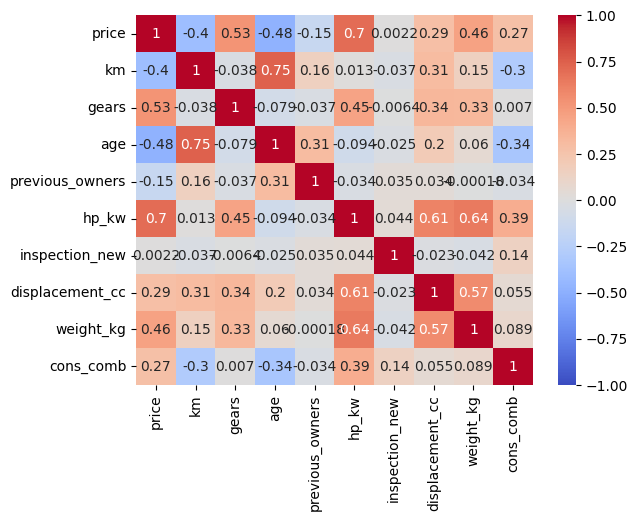

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [31]:
df.to_csv('for_cat_boost_eda.csv', index=False)

In [32]:
df_final_eda = df.copy()

# DATA Preprocessing

### train-test split

In [33]:
X=df.drop("price", axis=1)
y=df.price

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12798, 22)
Train target shape   :  (12798,)
Test features shape  :  (1423, 22)
Test target shape    :  (1423,)


## Modelling

In [35]:
# !pip install catboost

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [37]:
cat = X.select_dtypes("object").columns
cat

Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'extras', 'paint_type', 'upholstery_type', 'gearing_type', 'drive_chain', 'comfort_package', 'entertainment_media_package', 'safety_security_package'], dtype='object')

In [38]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

In [39]:
model = CatBoostRegressor(iterations=500, depth=10, learning_rate=0.05, loss_function='RMSE')


In [40]:
categorical_features_indices = ['make_model', 'body_type', 'vat', 'type', 'fuel', 'extras', 'paint_type', 'upholstery_type', 'gearing_type', 'drive_chain', 'comfort_package', 'entertainment_media_package', 'safety_security_package']

In [41]:
model.fit(X_train, y_train, cat_features=categorical_features_indices)


0:	learn: 7138.5542057	total: 232ms	remaining: 1m 55s
1:	learn: 6862.9326349	total: 328ms	remaining: 1m 21s
2:	learn: 6579.4220655	total: 416ms	remaining: 1m 8s
3:	learn: 6317.3722402	total: 515ms	remaining: 1m 3s
4:	learn: 6068.2318461	total: 604ms	remaining: 59.8s
5:	learn: 5818.8074385	total: 682ms	remaining: 56.2s
6:	learn: 5593.2990094	total: 770ms	remaining: 54.2s
7:	learn: 5383.7749642	total: 856ms	remaining: 52.7s
8:	learn: 5182.4553535	total: 945ms	remaining: 51.6s
9:	learn: 4991.8229027	total: 1.04s	remaining: 51.2s
10:	learn: 4807.1377931	total: 1.13s	remaining: 50.3s
11:	learn: 4629.2294964	total: 1.21s	remaining: 49.3s
12:	learn: 4473.1506042	total: 1.3s	remaining: 48.9s
13:	learn: 4314.2202320	total: 1.39s	remaining: 48.1s
14:	learn: 4169.6778903	total: 1.46s	remaining: 47.2s
15:	learn: 4038.8145522	total: 1.55s	remaining: 46.9s
16:	learn: 3908.3782411	total: 1.63s	remaining: 46.3s
17:	learn: 3783.7544854	total: 1.71s	remaining: 45.9s
18:	learn: 3665.1200493	total: 1.8s	r

152:	learn: 1573.6134798	total: 13.6s	remaining: 30.9s
153:	learn: 1573.5718747	total: 13.6s	remaining: 30.6s
154:	learn: 1572.2531332	total: 13.7s	remaining: 30.5s
155:	learn: 1570.2561608	total: 13.8s	remaining: 30.4s
156:	learn: 1568.3171165	total: 13.9s	remaining: 30.4s
157:	learn: 1567.0723740	total: 14s	remaining: 30.3s
158:	learn: 1563.8505614	total: 14.1s	remaining: 30.2s
159:	learn: 1563.8502077	total: 14.1s	remaining: 30s
160:	learn: 1563.7749030	total: 14.1s	remaining: 29.7s
161:	learn: 1562.6642420	total: 14.2s	remaining: 29.6s
162:	learn: 1560.6485700	total: 14.3s	remaining: 29.5s
163:	learn: 1556.9927783	total: 14.4s	remaining: 29.4s
164:	learn: 1553.9587939	total: 14.5s	remaining: 29.4s
165:	learn: 1549.3958540	total: 14.6s	remaining: 29.3s
166:	learn: 1548.3268775	total: 14.6s	remaining: 29.2s
167:	learn: 1547.1742792	total: 14.7s	remaining: 29.1s
168:	learn: 1545.5778414	total: 14.8s	remaining: 29s
169:	learn: 1542.0051628	total: 14.9s	remaining: 28.9s
170:	learn: 1540

304:	learn: 1356.8903323	total: 26.4s	remaining: 16.9s
305:	learn: 1355.1904089	total: 26.5s	remaining: 16.8s
306:	learn: 1354.2585299	total: 26.6s	remaining: 16.7s
307:	learn: 1352.6664040	total: 26.7s	remaining: 16.6s
308:	learn: 1351.7701199	total: 26.8s	remaining: 16.6s
309:	learn: 1349.8070762	total: 26.9s	remaining: 16.5s
310:	learn: 1348.5777538	total: 27s	remaining: 16.4s
311:	learn: 1346.5076033	total: 27s	remaining: 16.3s
312:	learn: 1345.3540042	total: 27.1s	remaining: 16.2s
313:	learn: 1344.3512261	total: 27.2s	remaining: 16.1s
314:	learn: 1343.9565825	total: 27.3s	remaining: 16s
315:	learn: 1343.8945888	total: 27.4s	remaining: 16s
316:	learn: 1343.3001626	total: 27.5s	remaining: 15.9s
317:	learn: 1341.2505045	total: 27.6s	remaining: 15.8s
318:	learn: 1340.1444704	total: 27.7s	remaining: 15.7s
319:	learn: 1339.1340822	total: 27.8s	remaining: 15.6s
320:	learn: 1337.6139740	total: 27.9s	remaining: 15.5s
321:	learn: 1336.3606311	total: 27.9s	remaining: 15.4s
322:	learn: 1336.2

456:	learn: 1216.6123323	total: 39.6s	remaining: 3.72s
457:	learn: 1215.2489155	total: 39.7s	remaining: 3.64s
458:	learn: 1213.9926881	total: 39.7s	remaining: 3.55s
459:	learn: 1213.8006868	total: 39.8s	remaining: 3.46s
460:	learn: 1213.3952355	total: 39.9s	remaining: 3.38s
461:	learn: 1212.0667368	total: 40s	remaining: 3.29s
462:	learn: 1210.9349019	total: 40.1s	remaining: 3.2s
463:	learn: 1209.9556823	total: 40.2s	remaining: 3.12s
464:	learn: 1209.4071485	total: 40.3s	remaining: 3.03s
465:	learn: 1208.5373913	total: 40.4s	remaining: 2.94s
466:	learn: 1207.7012820	total: 40.4s	remaining: 2.86s
467:	learn: 1205.6074860	total: 40.5s	remaining: 2.77s
468:	learn: 1204.3210528	total: 40.6s	remaining: 2.69s
469:	learn: 1203.7372348	total: 40.7s	remaining: 2.6s
470:	learn: 1203.4562655	total: 40.8s	remaining: 2.51s
471:	learn: 1202.7246094	total: 40.9s	remaining: 2.42s
472:	learn: 1202.0626395	total: 41s	remaining: 2.34s
473:	learn: 1200.9617036	total: 41s	remaining: 2.25s
474:	learn: 1200.8

In [42]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,9.694153e-01,9.588315e-01
mae,8.980361e+02,1.012725e+03
mse,1.687528e+06,2.242359e+06
rmse,1.299049e+03,1.497451e+03
mape,5.087699e-02,5.680581e-02


In [43]:
feature_importance = model.get_feature_importance(prettified=True)


In [44]:
feature_importance

,Feature Id,Importances
0,make_model,23.855357
1,age,19.379826
2,hp_kw,13.326493
3,km,12.227154
4,gearing_type,9.973966
5,type,4.269185
6,safety_security_package,2.059440
7,weight_kg,1.984858
8,comfort_package,1.940223
9,cons_comb,1.563770


In [45]:
y_pred =model.predict(X_test)
y_pred

array([24659.87561551, 18145.1887579 , 26321.54720446, ...,
       22829.87329597,  7047.52274569, 18440.55105685])

In [46]:
my_dict = {"Actual": y_test, "Pred":y_pred}

In [47]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred
9147,8700,8545.063203
10209,10979,10723.518645
15094,23099,27549.701783
15164,21990,22490.802609
10288,10141,10788.331074
8859,7950,7430.632274
7148,18450,17817.503871
6144,10700,9855.881744
3907,20498,19611.882286
3567,15980,14934.323876


In [ ]:
# # Grid Search için parametre aralıklarını tanımlayın
# param_grid = {
#     'iterations': [100, 200, 300,],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [6, 8, 10],
#     'l2_leaf_reg': [1, 3, 5],
# }

# # Grid Search Cross-Validation nesnesini oluşturun
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# # Modeli eğitim verileri üzerinde grid search ile eğitin
# grid_search.fit(X_train, y_train, cat_features=categorical_features_indices)

# # En iyi parametreleri ve skoru görüntüleyin
# print("Best parameters: ", grid_search.best_params_)
# print("Best scores: ", grid_search.best_score_)

# # En iyi modeli alın
# best_model = grid_search.best_estimator_


In [48]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,9.694153e-01,9.588315e-01
mae,8.980361e+02,1.012725e+03
mse,1.687528e+06,2.242359e+06
rmse,1.299049e+03,1.497451e+03
mape,5.087699e-02,5.680581e-02


In [ ]:
# # Grid Search için parametre aralıklarını tanımlayın
# param_grid = {
#     'iterations': [300,400,500],
#     'learning_rate': [0.1, 0.5, 1],
#     'depth': [8],
#     'l2_leaf_reg': [1],
# }

# # Grid Search Cross-Validation nesnesini oluşturun
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# # Modeli eğitim verileri üzerinde grid search ile eğitin
# grid_search.fit(X_train, y_train, cat_features=categorical_features_indices)

# # En iyi parametreleri ve skoru görüntüleyin
# print("En iyi parametreler: ", grid_search.best_params_)
# print("En iyi skor: ", grid_search.best_score_)

# # En iyi modeli alın
# best_model = grid_search.best_estimator_


0:	learn: 6837.5071587	total: 41.7ms	remaining: 20.8s
1:	learn: 6283.8973610	total: 86.3ms	remaining: 21.5s
2:	learn: 5789.1909179	total: 134ms	remaining: 22.3s
3:	learn: 5322.3648726	total: 177ms	remaining: 21.9s
4:	learn: 4923.6786500	total: 221ms	remaining: 21.9s
5:	learn: 4564.3211125	total: 265ms	remaining: 21.8s
6:	learn: 4242.1333707	total: 309ms	remaining: 21.8s
7:	learn: 3949.0045348	total: 352ms	remaining: 21.7s
8:	learn: 3689.7808673	total: 397ms	remaining: 21.7s
9:	learn: 3473.9671717	total: 441ms	remaining: 21.6s
10:	learn: 3271.5769675	total: 487ms	remaining: 21.7s
11:	learn: 3102.6673230	total: 532ms	remaining: 21.6s
12:	learn: 2951.9882183	total: 578ms	remaining: 21.6s
13:	learn: 2827.5432275	total: 628ms	remaining: 21.8s
14:	learn: 2711.0677981	total: 672ms	remaining: 21.7s
15:	learn: 2611.3901420	total: 718ms	remaining: 21.7s
16:	learn: 2525.1184056	total: 763ms	remaining: 21.7s
17:	learn: 2444.9357597	total: 805ms	remaining: 21.6s
18:	learn: 2375.2585696	total: 849ms

In [49]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,9.694153e-01,9.588315e-01
mae,8.980361e+02,1.012725e+03
mse,1.687528e+06,2.242359e+06
rmse,1.299049e+03,1.497451e+03
mape,5.087699e-02,5.680581e-02


In [50]:
model = CatBoostRegressor(iterations=500, depth=8, learning_rate=0.1, l2_leaf_reg= 1)

In [51]:
model.fit(X_train, y_train, cat_features=categorical_features_indices)


0:	learn: 6837.5071587	total: 51.4ms	remaining: 25.6s
1:	learn: 6283.8973610	total: 108ms	remaining: 26.9s
2:	learn: 5789.1909179	total: 163ms	remaining: 27s
3:	learn: 5322.3648726	total: 215ms	remaining: 26.6s
4:	learn: 4923.6786500	total: 266ms	remaining: 26.3s
5:	learn: 4564.3211125	total: 321ms	remaining: 26.4s
6:	learn: 4242.1333707	total: 374ms	remaining: 26.4s
7:	learn: 3949.0045348	total: 426ms	remaining: 26.2s
8:	learn: 3689.7808673	total: 479ms	remaining: 26.1s
9:	learn: 3473.9671717	total: 538ms	remaining: 26.4s
10:	learn: 3271.5769675	total: 595ms	remaining: 26.4s
11:	learn: 3102.6673230	total: 650ms	remaining: 26.5s
12:	learn: 2951.9882183	total: 710ms	remaining: 26.6s
13:	learn: 2827.5432275	total: 773ms	remaining: 26.8s
14:	learn: 2711.0677981	total: 825ms	remaining: 26.7s
15:	learn: 2611.3901420	total: 877ms	remaining: 26.5s
16:	learn: 2525.1184056	total: 934ms	remaining: 26.5s
17:	learn: 2444.9357597	total: 992ms	remaining: 26.6s
18:	learn: 2375.2585696	total: 1.04s	re

154:	learn: 1437.3588215	total: 8.55s	remaining: 19s
155:	learn: 1436.0075448	total: 8.61s	remaining: 19s
156:	learn: 1433.5478286	total: 8.66s	remaining: 18.9s
157:	learn: 1433.0568286	total: 8.72s	remaining: 18.9s
158:	learn: 1429.3444987	total: 8.78s	remaining: 18.8s
159:	learn: 1426.8177433	total: 8.83s	remaining: 18.8s
160:	learn: 1426.0679867	total: 8.88s	remaining: 18.7s
161:	learn: 1425.7441614	total: 8.93s	remaining: 18.6s
162:	learn: 1424.4941904	total: 8.99s	remaining: 18.6s
163:	learn: 1423.6420618	total: 9.04s	remaining: 18.5s
164:	learn: 1422.2066579	total: 9.1s	remaining: 18.5s
165:	learn: 1420.7211184	total: 9.15s	remaining: 18.4s
166:	learn: 1418.3032431	total: 9.21s	remaining: 18.4s
167:	learn: 1416.3553385	total: 9.27s	remaining: 18.3s
168:	learn: 1413.6547123	total: 9.32s	remaining: 18.3s
169:	learn: 1410.7140827	total: 9.38s	remaining: 18.2s
170:	learn: 1410.2638855	total: 9.44s	remaining: 18.2s
171:	learn: 1409.1468534	total: 9.5s	remaining: 18.1s
172:	learn: 1408

306:	learn: 1239.4613119	total: 17s	remaining: 10.7s
307:	learn: 1238.2393214	total: 17s	remaining: 10.6s
308:	learn: 1237.5502397	total: 17.1s	remaining: 10.6s
309:	learn: 1237.0019782	total: 17.2s	remaining: 10.5s
310:	learn: 1235.8593330	total: 17.2s	remaining: 10.5s
311:	learn: 1235.1837809	total: 17.3s	remaining: 10.4s
312:	learn: 1234.5608212	total: 17.3s	remaining: 10.4s
313:	learn: 1234.1674600	total: 17.4s	remaining: 10.3s
314:	learn: 1232.1610155	total: 17.4s	remaining: 10.2s
315:	learn: 1231.6406736	total: 17.5s	remaining: 10.2s
316:	learn: 1230.1771698	total: 17.6s	remaining: 10.1s
317:	learn: 1228.8551774	total: 17.6s	remaining: 10.1s
318:	learn: 1227.9230733	total: 17.7s	remaining: 10s
319:	learn: 1226.3234657	total: 17.7s	remaining: 9.97s
320:	learn: 1225.7554521	total: 17.8s	remaining: 9.92s
321:	learn: 1225.5664069	total: 17.8s	remaining: 9.86s
322:	learn: 1224.6176375	total: 17.9s	remaining: 9.8s
323:	learn: 1224.2251919	total: 17.9s	remaining: 9.75s
324:	learn: 1223.

459:	learn: 1107.0460355	total: 25.5s	remaining: 2.22s
460:	learn: 1105.6140700	total: 25.6s	remaining: 2.16s
461:	learn: 1104.8707865	total: 25.6s	remaining: 2.11s
462:	learn: 1104.3237283	total: 25.7s	remaining: 2.05s
463:	learn: 1102.8021442	total: 25.7s	remaining: 2s
464:	learn: 1102.1368934	total: 25.8s	remaining: 1.94s
465:	learn: 1101.4048447	total: 25.9s	remaining: 1.89s
466:	learn: 1100.5000991	total: 25.9s	remaining: 1.83s
467:	learn: 1099.7343122	total: 26s	remaining: 1.77s
468:	learn: 1099.3695982	total: 26s	remaining: 1.72s
469:	learn: 1098.1955405	total: 26.1s	remaining: 1.66s
470:	learn: 1097.7191252	total: 26.1s	remaining: 1.61s
471:	learn: 1096.1599255	total: 26.2s	remaining: 1.55s
472:	learn: 1095.1043541	total: 26.2s	remaining: 1.5s
473:	learn: 1094.0057282	total: 26.3s	remaining: 1.44s
474:	learn: 1093.4371867	total: 26.3s	remaining: 1.39s
475:	learn: 1093.1210211	total: 26.4s	remaining: 1.33s
476:	learn: 1092.8135755	total: 26.5s	remaining: 1.27s
477:	learn: 1092.6

In [52]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,9.727766e-01,9.601048e-01
mae,8.534986e+02,9.922004e+02
mse,1.502062e+06,2.173003e+06
rmse,1.225586e+03,1.474111e+03
mape,4.865875e-02,5.578696e-02


In [53]:
feature_importance = model.get_feature_importance(prettified=True)

In [54]:
feature_importance

,Feature Id,Importances
0,make_model,26.060900
1,age,16.842840
2,hp_kw,14.081166
3,km,13.426826
4,gearing_type,10.919731
5,type,3.564788
6,weight_kg,2.225431
7,cons_comb,2.046942
8,comfort_package,1.924283
9,safety_security_package,1.524054


In [55]:
y_pred = model.predict(X_test)
y_pred

array([25973.00935694, 18285.12315588, 26318.53430273, ...,
       22332.99220649,  7019.93084161, 18069.03780631])

In [56]:
my_dict = {"Actual": y_test, "Pred":y_pred}

In [57]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred
5957,13900,14283.719046
2662,18500,16012.945570
6666,17400,15483.601794
5988,12390,14583.070364
5187,26015,25991.429776
9759,9890,9432.043540
9931,17091,16414.788139
3894,20900,20503.578979
1567,23467,25838.624820
5809,15900,17351.236634


In [58]:
drop_list = feature_importance.loc[feature_importance['Importances'] < 3, 'Feature Id'].tolist()
drop_list

['weight_kg',
 'cons_comb',
 'comfort_package',
 'safety_security_package',
 'extras',
 'body_type',
 'upholstery_type',
 'gears',
 'drive_chain',
 'fuel',
 'displacement_cc',
 'previous_owners',
 'inspection_new',
 'paint_type',
 'entertainment_media_package',
 'vat']

In [60]:
X = df_final_eda.drop(columns=drop_list + ["price"], axis=1)
y = df_final_eda["price"]

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12798, 6)
Train target shape   :  (12798,)
Test features shape  :  (1423, 6)
Test target shape    :  (1423,)


In [62]:
X.head()

,make_model,km,type,age,hp_kw,gearing_type
0,Audi A1,56013.0,Used,3.0,66.0,Automatic
1,Audi A1,80000.0,Used,2.0,141.0,Automatic
2,Audi A1,83450.0,Used,3.0,85.0,Automatic
3,Audi A1,73000.0,Used,3.0,66.0,Automatic
4,Audi A1,16200.0,Used,3.0,66.0,Automatic


In [63]:
cat = X.select_dtypes("object").columns.tolist()
cat

['make_model', 'type', 'gearing_type']

In [64]:
final_model = CatBoostRegressor(iterations=500, depth=8, learning_rate=0.1, l2_leaf_reg= 1)
final_model.fit(X_train, y_train, cat_features=cat)

0:	learn: 6826.7314404	total: 34.9ms	remaining: 17.4s
1:	learn: 6289.3528446	total: 68.1ms	remaining: 16.9s
2:	learn: 5802.3921557	total: 105ms	remaining: 17.3s
3:	learn: 5368.1349174	total: 141ms	remaining: 17.5s
4:	learn: 4974.9176779	total: 177ms	remaining: 17.5s
5:	learn: 4615.1495906	total: 215ms	remaining: 17.7s
6:	learn: 4294.5276311	total: 262ms	remaining: 18.4s
7:	learn: 4016.9958177	total: 298ms	remaining: 18.3s
8:	learn: 3780.6077765	total: 331ms	remaining: 18s
9:	learn: 3564.9997742	total: 362ms	remaining: 17.8s
10:	learn: 3376.0911266	total: 395ms	remaining: 17.6s
11:	learn: 3210.6370579	total: 428ms	remaining: 17.4s
12:	learn: 3059.5069121	total: 461ms	remaining: 17.3s
13:	learn: 2927.5768843	total: 497ms	remaining: 17.2s
14:	learn: 2812.1609500	total: 530ms	remaining: 17.1s
15:	learn: 2727.1592966	total: 557ms	remaining: 16.8s
16:	learn: 2644.3687224	total: 589ms	remaining: 16.7s
17:	learn: 2558.8287677	total: 621ms	remaining: 16.6s
18:	learn: 2494.6326026	total: 653ms	r

155:	learn: 1724.1029896	total: 5.44s	remaining: 12s
156:	learn: 1722.5374059	total: 5.48s	remaining: 12s
157:	learn: 1721.7569491	total: 5.51s	remaining: 11.9s
158:	learn: 1720.0446411	total: 5.54s	remaining: 11.9s
159:	learn: 1717.5508679	total: 5.58s	remaining: 11.8s
160:	learn: 1716.9574745	total: 5.61s	remaining: 11.8s
161:	learn: 1716.6845929	total: 5.64s	remaining: 11.8s
162:	learn: 1716.1692754	total: 5.67s	remaining: 11.7s
163:	learn: 1715.8650908	total: 5.7s	remaining: 11.7s
164:	learn: 1715.0534765	total: 5.74s	remaining: 11.6s
165:	learn: 1713.8253597	total: 5.77s	remaining: 11.6s
166:	learn: 1712.1627809	total: 5.8s	remaining: 11.6s
167:	learn: 1711.0707639	total: 5.83s	remaining: 11.5s
168:	learn: 1709.8722236	total: 5.87s	remaining: 11.5s
169:	learn: 1708.8908367	total: 5.91s	remaining: 11.5s
170:	learn: 1706.8907390	total: 5.94s	remaining: 11.4s
171:	learn: 1705.3454718	total: 5.97s	remaining: 11.4s
172:	learn: 1705.1058983	total: 6s	remaining: 11.3s
173:	learn: 1704.39

305:	learn: 1599.8909805	total: 10.5s	remaining: 6.67s
306:	learn: 1599.8301242	total: 10.6s	remaining: 6.63s
307:	learn: 1599.0620113	total: 10.6s	remaining: 6.6s
308:	learn: 1597.6129537	total: 10.6s	remaining: 6.56s
309:	learn: 1597.1503176	total: 10.7s	remaining: 6.53s
310:	learn: 1596.3050486	total: 10.7s	remaining: 6.49s
311:	learn: 1595.4998628	total: 10.7s	remaining: 6.46s
312:	learn: 1595.0504756	total: 10.7s	remaining: 6.42s
313:	learn: 1593.3279000	total: 10.8s	remaining: 6.39s
314:	learn: 1592.7754067	total: 10.8s	remaining: 6.35s
315:	learn: 1592.5413224	total: 10.8s	remaining: 6.32s
316:	learn: 1591.8429193	total: 10.9s	remaining: 6.28s
317:	learn: 1591.3209370	total: 10.9s	remaining: 6.25s
318:	learn: 1590.2353687	total: 10.9s	remaining: 6.21s
319:	learn: 1589.5307251	total: 11s	remaining: 6.18s
320:	learn: 1589.2149091	total: 11s	remaining: 6.14s
321:	learn: 1588.6107046	total: 11.1s	remaining: 6.11s
322:	learn: 1587.8269407	total: 11.1s	remaining: 6.08s
323:	learn: 158

456:	learn: 1510.1444933	total: 15.7s	remaining: 1.47s
457:	learn: 1509.6297034	total: 15.7s	remaining: 1.44s
458:	learn: 1509.3289026	total: 15.7s	remaining: 1.4s
459:	learn: 1508.7702609	total: 15.8s	remaining: 1.37s
460:	learn: 1508.3452365	total: 15.8s	remaining: 1.33s
461:	learn: 1507.9841371	total: 15.8s	remaining: 1.3s
462:	learn: 1507.6982895	total: 15.9s	remaining: 1.27s
463:	learn: 1506.7758735	total: 15.9s	remaining: 1.23s
464:	learn: 1506.4822091	total: 15.9s	remaining: 1.2s
465:	learn: 1506.1667633	total: 16s	remaining: 1.16s
466:	learn: 1505.9578865	total: 16s	remaining: 1.13s
467:	learn: 1505.5720546	total: 16s	remaining: 1.1s
468:	learn: 1505.3586303	total: 16.1s	remaining: 1.06s
469:	learn: 1505.0326462	total: 16.1s	remaining: 1.03s
470:	learn: 1504.0192086	total: 16.1s	remaining: 993ms
471:	learn: 1503.8313408	total: 16.2s	remaining: 959ms
472:	learn: 1503.1581960	total: 16.2s	remaining: 925ms
473:	learn: 1502.6975148	total: 16.2s	remaining: 891ms
474:	learn: 1501.372

In [65]:
train_val(final_model, X_train, y_train, X_test, y_test)

,train,test
R2,9.542775e-01,9.472762e-01
mae,1.043605e+03,1.115232e+03
mse,2.522763e+06,2.871747e+06
rmse,1.588321e+03,1.694623e+03
mape,5.771632e-02,6.162389e-02


In [66]:
feature_importance = final_model.get_feature_importance(prettified=True)

In [67]:
feature_importance

,Feature Id,Importances
0,make_model,28.678311
1,hp_kw,26.375019
2,age,21.088992
3,gearing_type,10.601927
4,km,9.965774
5,type,3.289977


In [68]:
y_pred =final_model.predict(X_test)
y_pred

array([24990.88265486, 18464.86932672, 27325.37223867, ...,
       23263.74997008,  7281.16379449, 19004.11558098])

In [69]:
my_dict = {"Actual": y_test, "Pred":y_pred}

In [70]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred
3081,15450,14483.782528
1318,15580,15145.329958
3888,20990,20459.576870
6867,12250,12231.704851
5785,15770,15141.172962
8912,11750,8987.811224
5116,26500,25414.319526
8685,7450,7471.364483
10384,11270,10816.308090
14881,10890,10967.275536


In [71]:
import pickle

In [72]:
filename = 'my_model'
pickle.dump(final_model, open(filename, 'wb'))

In [73]:


final_model = pickle.load(open('my_model', 'rb'))